In [2]:
# 2.提前预习 10 支持向量机.ipynb 最新更新的笔记(把SVM分类用梯度下降实现); 大概理解笔记后，尝试自己对照笔记,实现用梯度下降实现SVM分类
# 并把自定义的SVM分类用于 iris data(鸢尾花数据);取花瓣长度 和 花瓣宽度特征，分类 看是不是 分类2的花((iris.target == 2)对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

测试集准确率: 0.6333


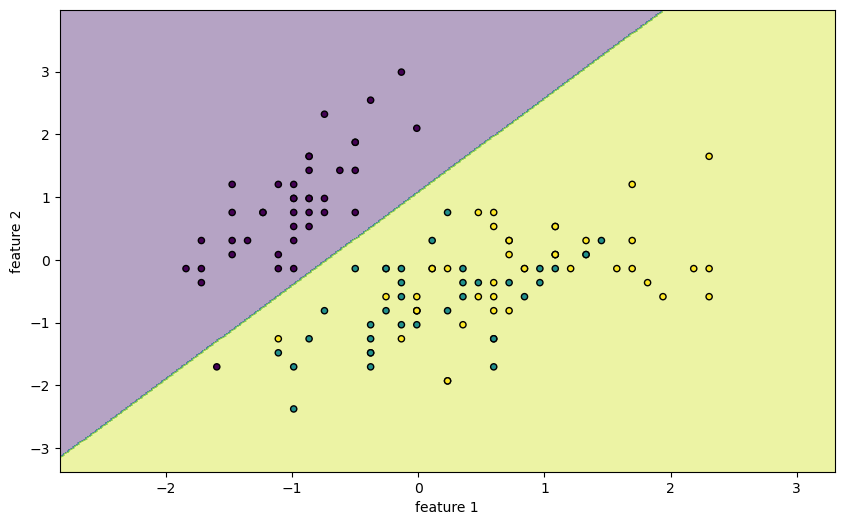

D:\AppData\Envs\BioEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Envs\BioEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Envs\BioEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Envs\BioEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\AppData\Envs\BioEnv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.c

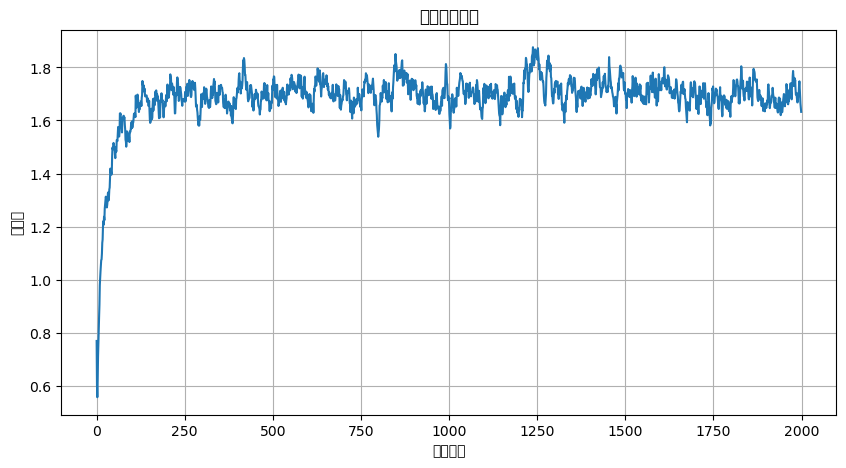

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
 
class GradientDescentSVM:
    def __init__(self, C=1.0, learning_rate=0.01, n_iter=1000, batch_size=32):
        self.C = C  # 正则化参数
        self.lr = learning_rate  # 学习率
        self.n_iter = n_iter  # 迭代次数
        self.batch_size = batch_size  # 单批次数据量
        self.w = None  
        self.b = None  
        self.loss_history = []  # 损失历史
    
    def hinge_loss(self, X, y):
        scores = np.dot(X, self.w) + self.b
        loss = np.maximum(0, 1 - y * scores)
        return np.mean(loss) + 0.5 * np.dot(self.w, self.w)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0

        y_ = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iter):
            # 随机批量梯度下降
            indices = np.random.choice(n_samples, self.batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y_[indices]
            
            scores = np.dot(X_batch, self.w) + self.b
            
            hinge = 1 - y_batch * scores
            mask = hinge > 0 
            
            dw = np.zeros_like(self.w)
            db = 0
            
            if np.any(mask):
                dw = self.w - self.C * np.dot(X_batch[mask].T, y_batch[mask])
                db = -self.C * np.sum(y_batch[mask])
            else:
                dw = self.w  
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
            current_loss = self.hinge_loss(X, y_)
            self.loss_history.append(current_loss)
    
    def predict(self, X):
        scores = np.dot(X, self.w) + self.b
        return np.where(scores >= 0, 1, 0)
    
    def decision_function(self, X):
        return np.dot(X, self.w) + self.b

X = iris.data[:, [0, 1]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = make_pipeline(SimpleImputer(strategy='mean') ,StandardScaler())
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
svm_gd = GradientDescentSVM(C=1.0, learning_rate=0.01, n_iter=2000, batch_size=32)
svm_gd.fit(X_train, y_train)
 
# 预测
y_pred = svm_gd.predict(X_test)
print(f"测试集准确率: {accuracy_score(y_test, y_pred):.4f}")
 
# 绘制决策边界
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.show()
 
plot_decision_boundary(svm_gd, X_train, y_train)
 
# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(range(len(svm_gd.loss_history)), svm_gd.loss_history)
plt.title("训练损失曲线")
plt.xlabel("迭代次数")
plt.ylabel("损失值")
plt.grid()
plt.show()